In [1]:
from qiskit import QuantumCircuit, IBMQ, Aer
from qiskit.tools.visualization import plot_histogram
from qiskit import execute
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Available local and remote backends

Check out tutorials on how to setup an account:
https://github.com/Qiskit/qiskit-iqx-tutorials

In [2]:
# print local backends
print('Available AER backends:')
for backend in Aer.backends():
    print('    - %s' % backend)

Available AER backends:
    - qasm_simulator
    - statevector_simulator
    - unitary_simulator


In [3]:
# load account
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [4]:
# check providers in account
print('Available IBMQ providers:')
for provider in IBMQ.providers():
    print('    - %s' % provider)

Available IBMQ providers:
    - <AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>
    - <AccountProvider for IBMQ(hub='ibm-q-internal', group='zrl', project='main')>


In [5]:
# select provider and print backends
provider = IBMQ.get_provider(hub='ibm-q')
print('Available backends:')
for backend in provider.backends():
    print('    - %s' % backend)

Available backends:
    - ibmq_qasm_simulator
    - ibmqx4
    - ibmqx2
    - ibmq_16_melbourne
    - ibmq_ourense


In [6]:
# select a backend for the tutorial
backend = Aer.get_backend('qasm_simulator')

# Setting up Quantum Circuits

Before we can work with qubits and quantum gates, we first have to initialize our quantum circuit with the corresponding quantum and classical registers.
<br>
Please note that given $n$ qubits/bits in a quantum/classical register the qubits/bits are read in the following order: $[q_{n-1}, ..., q_1, q_0]$.

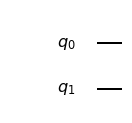

In [7]:
# create a quantum circuit
qc = QuantumCircuit(2)
qc.draw(output='mpl')

# Some basic gates

## X gate

The X gate is the quantum equivalent to the classical NOT gate and, thus, flips $|0\rangle$ to $|1\rangle$ and vice versa.<br>
In matrix form the quantum gate reads
$\left(\begin{array}{cc} 0 & 1 \\ 1 & 0 \end{array} \right)$.
<br>
<br>
<b>Exercise:</b><br>
Try to create a circuit that generates the state |10>.

counts: {'01': 1}


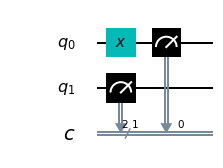

In [8]:
# create a quantum circuit
qc = QuantumCircuit(2, 2)

# add a X gate on qubit, flipping it from |0> to |1>
qc.x(0)
# qc.x(1)

# measure qubit
qc.measure([0, 1], [0, 1]);

# compile and run the quantum circuit
shots = 1
job = execute(qc, backend, shots=shots)
results = job.result()
print("counts:", results.get_counts())

# plot the circuit
qc.draw(output='mpl')

## H gate

The H gate reads
$\frac{1}{\sqrt{2}}\left(\begin{array}{cc} 1 & 1 \\ 1 & -1 \end{array} \right)$.
Thus, it maps $|0\rangle$ to $\frac{1}{\sqrt{2}}(|0\rangle + |1\rangle) =: |+\rangle$, i.e., into the equal superposition state.
<br>
<br>
<b>Exercise:</b><br>
Repeat the experiment a couple of times.<br>
How does the result behave?<br>
What happens if you increase the number of shots?

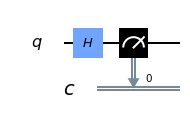

In [9]:
# create a quantum circuit
qc = QuantumCircuit(1, 1)

# add a H gate and apply it on qubit 0, mapping |0> to 1/√2(|0⟩+|1⟩)=:|+⟩
qc.h(0)

# measure qubit
qc.measure(0, 0)

# plot the circuit
qc.draw(output='mpl')

counts: {'0': 1}


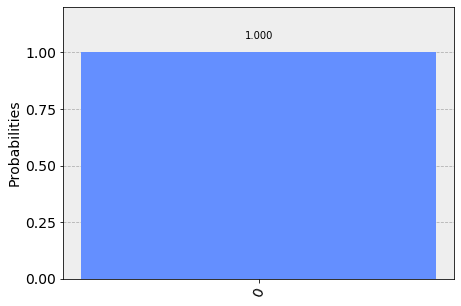

In [10]:
# compile and run the quantum circuit on the local simulator
shots = 1
job = execute(qc, backend, shots=shots)
results = job.result()
print("counts:", results.get_counts())

# plot results
plot_histogram(results.get_counts())

## Y rotation

A Y-rotation of angle $\theta$, denoted $R_y(\theta)$, acts like
$e^{-i\frac{\theta}{2}Y} = \left(\begin{array}{cc} \cos(\theta/2) & -\sin(\theta/2) \\ \sin(\theta/2) & \cos(\theta/2) \end{array} \right)$.<br>
It rotates a single qubit state around the Y-axis of the Bloch sphere.<br>
When applied to $|0\rangle$, the probability of measuring $|1\rangle$ equals $\sin^2(\theta/2)$.
<br>
<br>


<b>Exercise:</b><br>
Find $\theta$ such that $\mathbb{P}[|1\rangle] = 75\%$ and verify it by executing the circuit.

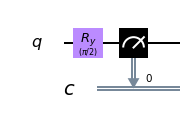

In [11]:
# create a quantum circuit
qc = QuantumCircuit(1, 1)

# add a Y-rotation on qubit 0 with rotation angle theta
theta = np.pi/2
qc.ry(theta, 0)

# measure qubit
qc.measure(0, 0)

# plot the circuit
qc.draw(output='mpl')

counts: {'1': 489, '0': 511}


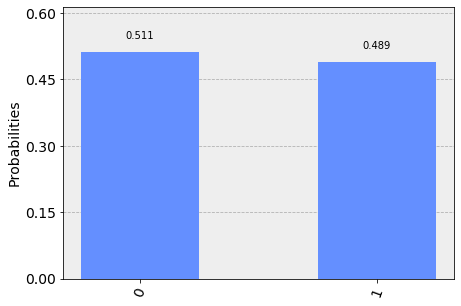

In [12]:
# compile and run the quantum circuit on the local simulator
shots = 1000
job = execute(qc, backend, shots=shots)
results = job.result()
print("counts:", results.get_counts())

# plot results
plot_histogram(results.get_counts())

## CX gate

A controlled X (CX) gate acts on two qubits like
$\left(\begin{array}{cccc} 
1 & 0 & 0 & 0 \\ 
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 \end{array} \right)$.
<br>
Thus, it flips (applies an X gate to) the second qubit if the first qubit is $|1\rangle$ and otherwise has no effect.
<br>
<br>
<b>Exercise:</b><br>
See what happens when applying the CX to $|00\rangle$, $|01\rangle$, $|10\rangle$, $|11\rangle$.
<br>
The initial qubit states can be prepared via single-qubit X gates.

counts: {'11': 1}


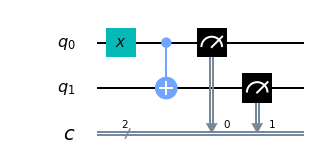

In [13]:
# create a quantum circuit
qc = QuantumCircuit(2, 2)

# set initial state
qc.x(0)  # flips q[0] from |0> to |1>
# qc.x(1)  # flips q[1] from |0> to |1>

# apply CX gate with control q[0] and target q[1]
qc.cx(0, 1)

# measure qubit
qc.measure([0, 1], [0, 1])

# compile and run the quantum circuit on the local simulator
shots = 1
job = execute(qc, backend, shots=shots)
results = job.result()
print("counts:", results.get_counts())

# plot the circuit
qc.draw(output='mpl')

# The Bell state

A Bell state is a fully entangled state of two qubits that has no classical counter part.
<br>
It is given by: $$\frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$$

Given an initial two qubit system $|00\rangle$, we create a Bell state by applying an H gate to the first qubit and, then, a CX gate where the first qubit acts as control and the second qubit as target state.

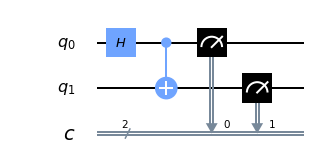

In [14]:
# create a quantum circuit
qc = QuantumCircuit(2, 2)

# add a H gate on qubit 0, putting this qubit in superposition
qc.h(0)

# add a CX (CNOT) gate on control qubit 0 and target qubit 1
qc.cx(0, 1)

# add a measure gate to see the state.
qc.measure([0, 1], [0, 1])

# plot the circuit
qc.draw(output='mpl')

counts: {'00': 507, '11': 493}


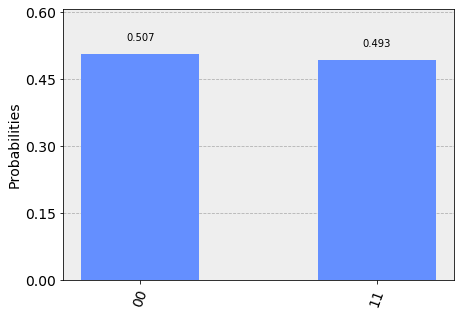

In [15]:
# compile and run the quantum circuit on the local simulator
shots = 1000
job = execute(qc, backend, shots=shots)
results = job.result()
print("counts:", results.get_counts())

# plot results
plot_histogram(results.get_counts())

<b>Exercise:</b><br>
Prepare the following state: $\frac{1}{\sqrt{2}}(|01\rangle + |10\rangle)$ by designing a quantum circuit that is similar to the Bell state construction.

In [ ]:
qc = QuantumCircuit(2, 2)

# write your circuit here:
#
#
#

qc.measure([0, 1], [0, 1])

# plot the circuit
qc.draw(output='mpl')

In [ ]:
# compile and run the quantum circuit on the local simulator
job = execute(qc, backend, shots=1024)
results = job.result()
print("counts:", results.get_counts())

# plot results
plot_histogram(results.get_counts())